In [1]:
pip install pandas matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [5]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Exploratory Data Analysis (EDA)

## 1. Customer Analysis
### Region-wise customer distribution

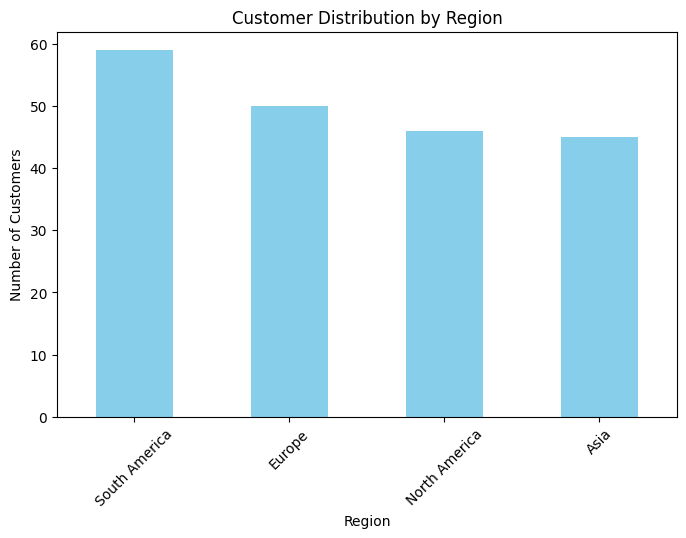

In [6]:
plt.figure(figsize=(8, 5))
customers['Region'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

### Customer signups over time

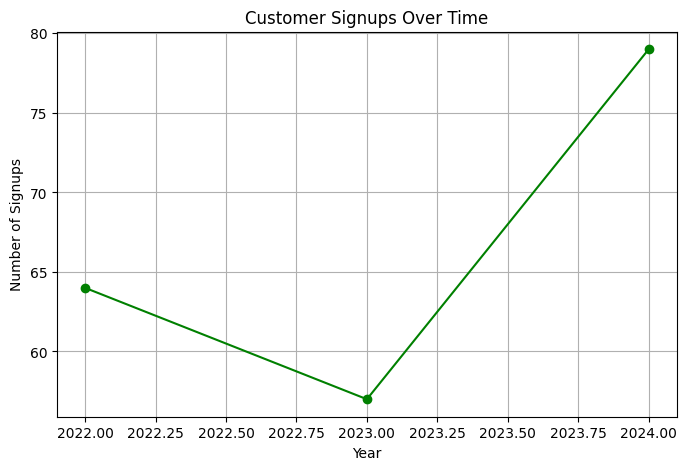

In [7]:
customers['SignupYear'] = customers['SignupDate'].dt.year
plt.figure(figsize=(8, 5))
customers['SignupYear'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title("Customer Signups Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()

## 2. Product Analysis
### Category-wise product distribution

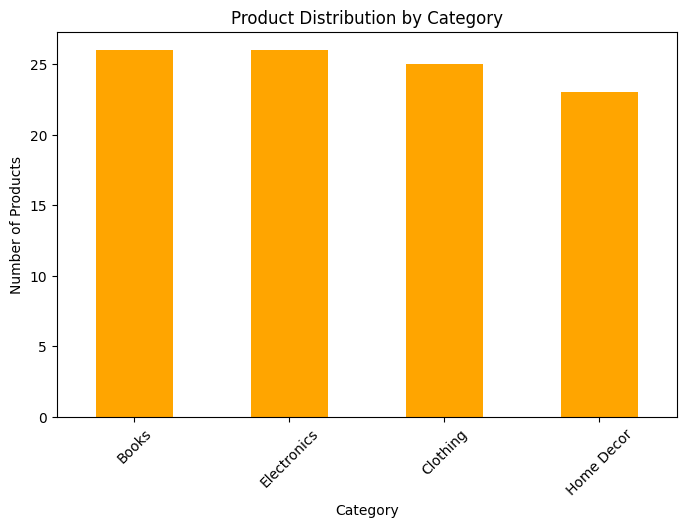

In [8]:
plt.figure(figsize=(8, 5))
products['Category'].value_counts().plot(kind='bar', color='orange')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

### Product price distribution

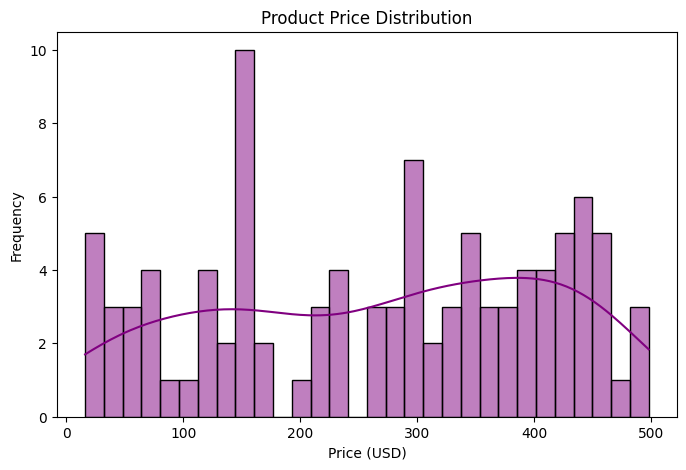

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=30, color='purple', kde=True)
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

## 3. Transaction Analysis
### Top customers by total transaction value

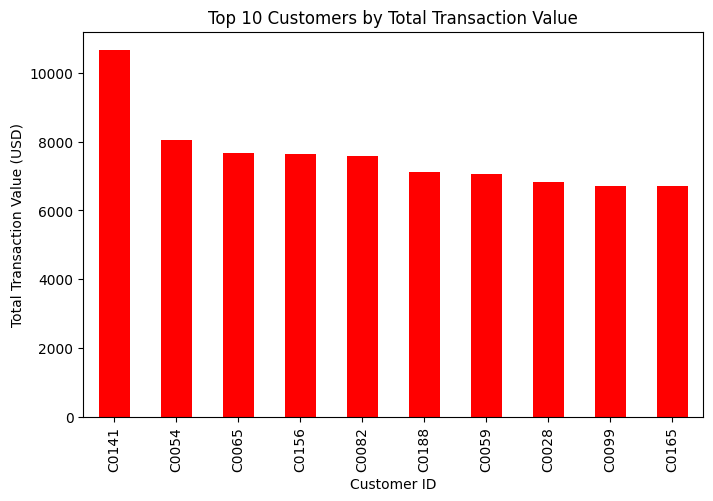

In [10]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_customers.plot(kind='bar', color='red')
plt.title("Top 10 Customers by Total Transaction Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Transaction Value (USD)")
plt.show()

### Top products by quantity sold

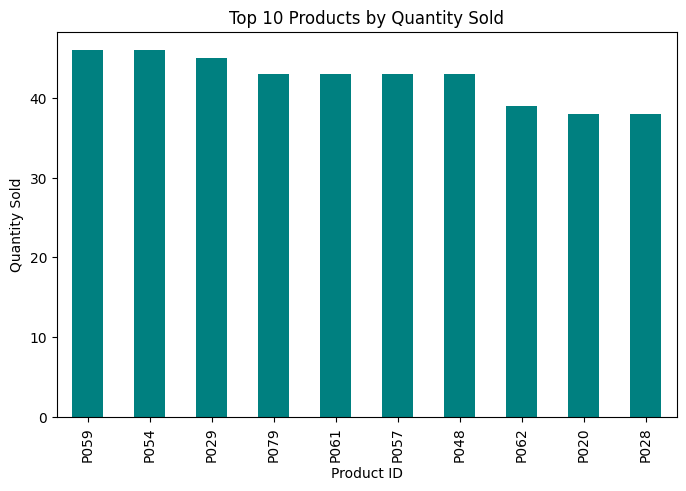

In [11]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='teal')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product ID")
plt.ylabel("Quantity Sold")
plt.show()

### Seasonal transaction trends

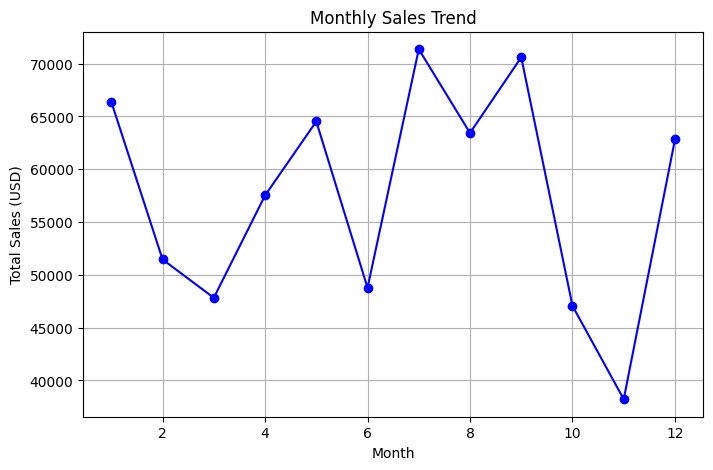

In [12]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()

## 4. Price consistency check

In [13]:
price_check = transactions.merge(products[['ProductID', 'Price']], on='ProductID', suffixes=('_trans', '_prod'))
price_check['PriceDifference'] = price_check['Price_trans'] - price_check['Price_prod']
price_issues = price_check[price_check['PriceDifference'] != 0]
print(f"Number of transactions with price inconsistencies: {len(price_issues)}")


Number of transactions with price inconsistencies: 0


### Final insights

In [15]:
print("1. The majority of customers belong to certain regions. Other regions could be targeted for expansion.")
print("2. Customer signups have shown growth over time, indicating increased interest in the platform.")
print("3. Certain product categories dominate the catalog, offering opportunities to expand lesser-known categories.")
print("4. A small number of top customers contribute significantly to revenue. Loyalty programs could retain them.")
print("5. Monthly sales trends reveal seasonal peaks. These months should be the focus of marketing campaigns.")

1. The majority of customers belong to certain regions. Other regions could be targeted for expansion.
2. Customer signups have shown growth over time, indicating increased interest in the platform.
3. Certain product categories dominate the catalog, offering opportunities to expand lesser-known categories.
4. A small number of top customers contribute significantly to revenue. Loyalty programs could retain them.
5. Monthly sales trends reveal seasonal peaks. These months should be the focus of marketing campaigns.
